In [1]:
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def insertion_sort(items: [int]):
    for i in range(len(items)):
        j = i
        while j > 0 and items[j-1] > items[j]:
            items[j-1], items[j] = items[j], items[j-1]
            j -= 1

In [3]:
def selection_sort(items: [int]):
    for i in range(len(items)):
        ind_min = i
        for j in range(i + 1, len(items)):
            if items[j] < items[ind_min]:
                ind_min = j
        items[ind_min], items[i] = items[i], items[ind_min]

In [4]:
def bubble_sort(items: [int]):
    for i in range(len(items)):
        for j in range(len(items)-1, i-1, -1):
            if (items[j-1] > items[j]):
                items[j], items[j-1] = items[j-1], items[j]

In [5]:
def countig_sort(items: [int]):
    cnt = [0] * 100000
    for x in items:
        cnt[x] += 1
    i = 0
    for j in range(len(cnt)):
        for k in range(cnt[j]):
            items[i] = j
            i += 1
            

In [6]:
def heapify(a: [int], n: int, i: int):
    l = 2 * i + 1
    r = 2 * i + 2
    largest = i
    if l < n and a[l] > a[i]:
        largest = l
    if r < n and a[r] > a[largest]:
        largest = r
    if largest != i:
        a[i], a[largest] = a[largest], a[i]
        heapify(a, n, largest)

def make_heap(a: [int], n: int):
    for i in range(n//2-1, -1, -1):
        heapify(a, n, i)
        
def heap_sort(a: [int]):
    make_heap(a, len(a))
    
    for i in range(len(a)-1, -1, -1):
        a[0], a[i] = a[i], a[0]
        heapify(a, i, 0)

In [7]:
def gen_arr(array_type: str, size: int) -> [int]:
    arr = [random.randint(0, 10000) for i in range(size)]
    if array_type == 'RANDOM':
        return arr
    if array_type == 'SORTED ASCENDING':
        return sorted(arr)
    if array_type == 'SORTED DESCENDING':
        return sorted(arr)[::-1]
    if array_type == 'EQUAL':
        x = random.randint(0, 100000)
        return [x for i in range(size)]

In [8]:
amount_of_elements = [100, 500, 1000, 2000, 4000, 5000, 10000]

In [12]:
def measure_time(func) -> [tuple]:
    ans = []
    for cnt in amount_of_elements:
        arr1 = gen_arr('RANDOM', cnt)
        arr2 = gen_arr('SORTED ASCENDING', cnt)
        arr3 = gen_arr('SORTED DESCENDING', cnt)
        arr4 = gen_arr('EQUAL', cnt)
        start_time1 = time.time()
        func(arr1)
        run_time1 = time.time() - start_time1
        start_time2 = time.time()
        func(arr2)
        run_time2 = time.time() - start_time2
        start_time3 = time.time()
        func(arr3)
        run_time3 = time.time() - start_time3
        start_time4 = time.time()
        func(arr4)
        run_time4 = time.time() - start_time4
        ans.append((run_time1, run_time2, run_time3, run_time4))
    return ans


In [13]:
result = [
    measure_time(insertion_sort),
    measure_time(selection_sort),
    measure_time(bubble_sort),
    measure_time(countig_sort),
    measure_time(heap_sort)
]

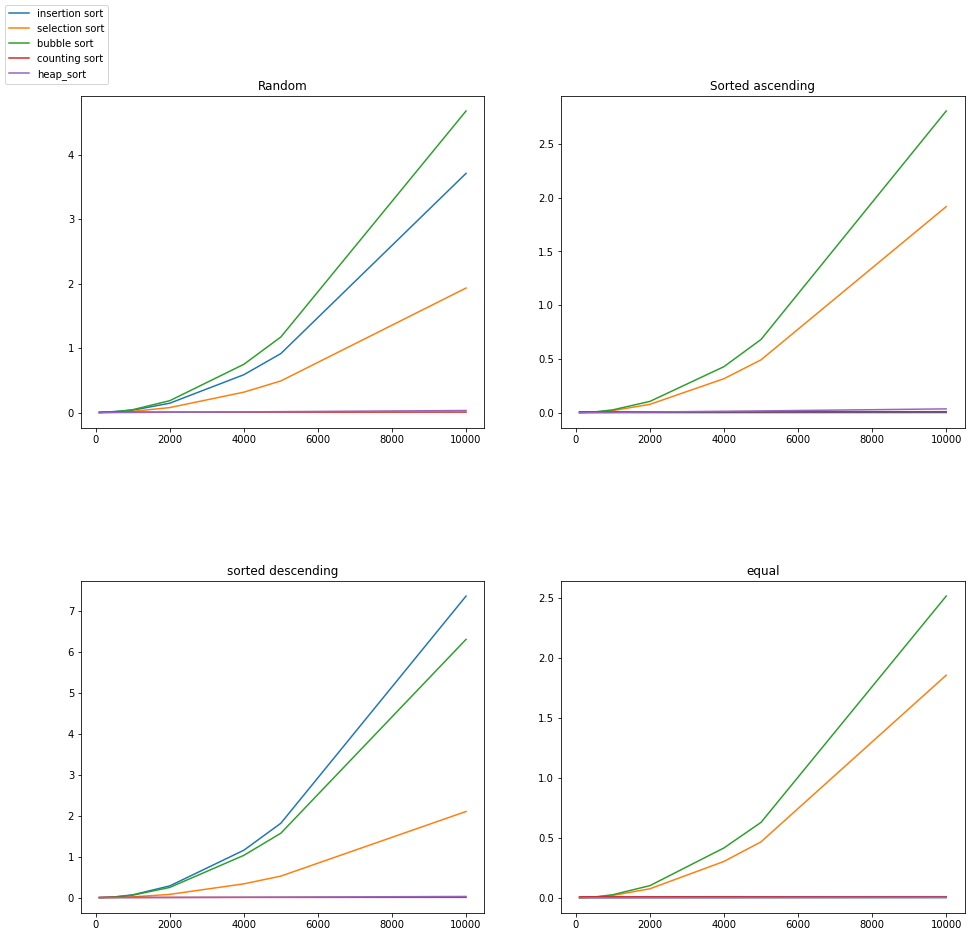

In [14]:
fig, axs = plt.subplots(2, 2)
t1, = axs[0, 0].plot(amount_of_elements, [row[0] for row in result[0]])
t2, = axs[0, 0].plot(amount_of_elements, [row[0] for row in result[1]])
t3, = axs[0, 0].plot(amount_of_elements, [row[0] for row in result[2]])
t4, = axs[0, 0].plot(amount_of_elements, [row[0] for row in result[3]])
t5, = axs[0, 0].plot(amount_of_elements, [row[0] for row in result[4]])
fig.legend([t1, t2, t3, t4, t5],['insertion sort', 'selection sort', 'bubble sort', 'counting sort', 'heap_sort'], loc="upper left")
axs[0, 0].set_title('Random')
axs[0, 1].plot(amount_of_elements, [row[1] for row in result[0]])
axs[0, 1].plot(amount_of_elements, [row[1] for row in result[1]])
axs[0, 1].plot(amount_of_elements, [row[1] for row in result[2]])
axs[0, 1].plot(amount_of_elements, [row[1] for row in result[3]])
axs[0, 1].plot(amount_of_elements, [row[1] for row in result[4]])
axs[0, 1].set_title('Sorted ascending')
axs[1, 0].plot(amount_of_elements, [row[2] for row in result[0]])
axs[1, 0].plot(amount_of_elements, [row[2] for row in result[1]])
axs[1, 0].plot(amount_of_elements, [row[2] for row in result[2]])
axs[1, 0].plot(amount_of_elements, [row[2] for row in result[3]])
axs[1, 0].plot(amount_of_elements, [row[2] for row in result[4]])
axs[1, 0].set_title('sorted descending')
axs[1, 1].plot(amount_of_elements, [row[3] for row in result[0]])
axs[1, 1].plot(amount_of_elements, [row[3] for row in result[1]])
axs[1, 1].plot(amount_of_elements, [row[3] for row in result[2]])
axs[1, 1].plot(amount_of_elements, [row[3] for row in result[3]])
axs[1, 1].plot(amount_of_elements, [row[3] for row in result[4]])
axs[1, 1].set_title('equal')
fig.tight_layout()
fig.set_figheight(14)
fig.set_figwidth(14)